In [47]:
import pandas as pd
import numpy as np
%config InlineBackend.figure_format = 'retina'
pd.set_option('display.max_columns', 50)


In [48]:
df = pd.read_csv('train_weather_per_station.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)
df.head()

,Num_Duplicates,WnvPresent,Year,Month,Day,CULEX ERRATICUS,CULEX PIPIENS,CULEX PIPIENS/RESTUANS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TARSALIS,CULEX TERRITANS,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Cool,Sunrise,Sunset,PrecipTotal,ResultSpeed,ResultDir
Date,,,,,,,,,,,,,,,,,,,,,,,,
2007-05-29,1,0,2007,5,29,0,0,1,0,0,0,0,88,60,74,10,58,65,9,421,1917,0.0,5.8,18
2007-05-29,1,0,2007,5,29,0,0,0,1,0,0,0,88,60,74,10,58,65,9,421,1917,0.0,5.8,18
2007-05-29,1,0,2007,5,29,0,0,0,1,0,0,0,88,60,74,10,58,65,9,421,1917,0.0,5.8,18
2007-05-29,1,0,2007,5,29,0,0,1,0,0,0,0,88,60,74,10,58,65,9,421,1917,0.0,5.8,18
2007-05-29,1,0,2007,5,29,0,0,0,1,0,0,0,88,60,74,10,58,65,9,421,1917,0.0,5.8,18


In [49]:
test = pd.read_csv('test_weather_per_station.csv')
test['Date'] = pd.to_datetime(test['Date'])
test.set_index('Date', inplace = True)
test.head()

,Num_Duplicates,Year,Month,Day,CULEX ERRATICUS,CULEX PIPIENS,CULEX PIPIENS/RESTUANS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TARSALIS,CULEX TERRITANS,UNSPECIFIED CULEX,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Cool,Sunrise,Sunset,PrecipTotal,ResultSpeed,ResultDir
Date,,,,,,,,,,,,,,,,,,,,,,,,
2008-06-11,1,2008,6,11,0,0,1,0,0,0,0,0,86,61,74,7,56,64,9,416,1926,0.0,8.9,18
2008-06-11,1,2008,6,11,0,0,0,1,0,0,0,0,86,61,74,7,56,64,9,416,1926,0.0,8.9,18
2008-06-11,1,2008,6,11,0,1,0,0,0,0,0,0,86,61,74,7,56,64,9,416,1926,0.0,8.9,18
2008-06-11,1,2008,6,11,0,0,0,0,1,0,0,0,86,61,74,7,56,64,9,416,1926,0.0,8.9,18
2008-06-11,1,2008,6,11,0,0,0,0,0,0,1,0,86,61,74,7,56,64,9,416,1926,0.0,8.9,18


In [19]:
virus_by_year = df[df['WnvPresent'] == 1].groupby('Year').sum()['WnvPresent']
virus_by_year = pd.DataFrame(virus_by_year)
virus_by_year

,WnvPresent
Year,
2007,717
2009,37
2011,115
2013,349


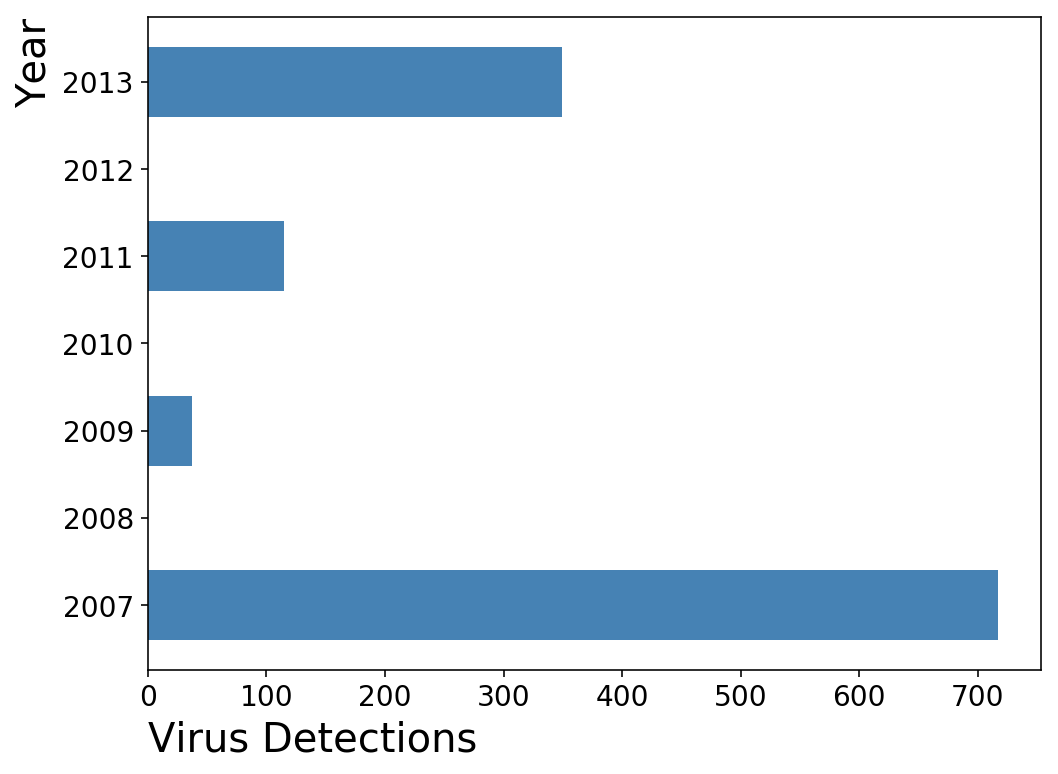

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.barh(virus_by_year.index, virus_by_year['WnvPresent'], color = 'steelblue')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Year', fontsize = 20, ha = 'right', y=1)
plt.xlabel('Virus Detections', fontsize = 20, ha = 'left', x=0);

In [39]:
virus_by_month = df[df['WnvPresent'] == 1].groupby('Month').sum()['WnvPresent']
virus_by_month = pd.DataFrame(virus_by_month)
virus_by_month

,WnvPresent
Month,
6,1
7,165
8,818
9,232
10,2


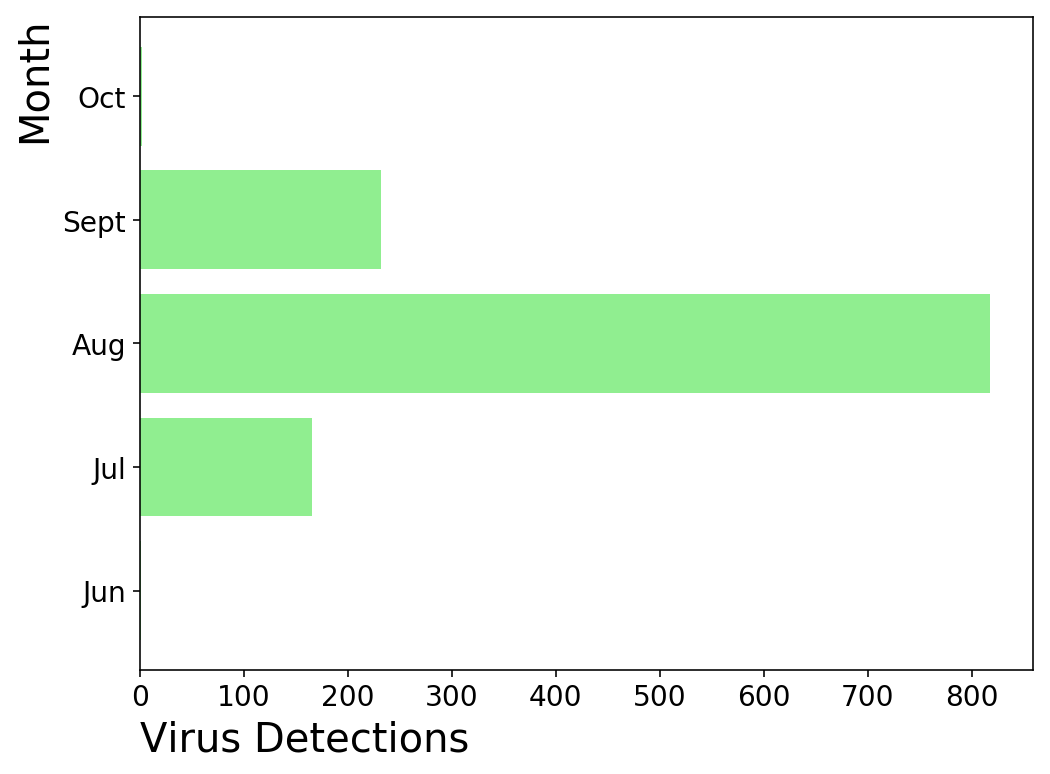

In [44]:
plt.figure(figsize=(8,6))
plt.barh(virus_by_month.index, virus_by_month['WnvPresent'], color = 'lightgreen')
plt.xticks(fontsize = 14)
plt.yticks(virus_by_month.index,['Jun','Jul','Aug','Sept','Oct'],fontsize = 14)
plt.ylabel('Month', fontsize = 20, ha = 'right', y=1)
plt.xlabel('Virus Detections', fontsize = 20, ha = 'left', x=0);

In [56]:
virus_by_species = df[df['WnvPresent'] == 1][['CULEX ERRATICUS', 'CULEX PIPIENS','CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS', 'CULEX SALINARIUS',
                         'CULEX TARSALIS', 'CULEX TERRITANS']].sum()
virus_by_species = pd.DataFrame(virus_by_species, columns=['virus_detections'])
virus_by_species

,virus_detections
CULEX ERRATICUS,0
CULEX PIPIENS,679
CULEX PIPIENS/RESTUANS,457
CULEX RESTUANS,82
CULEX SALINARIUS,0
CULEX TARSALIS,0
CULEX TERRITANS,0


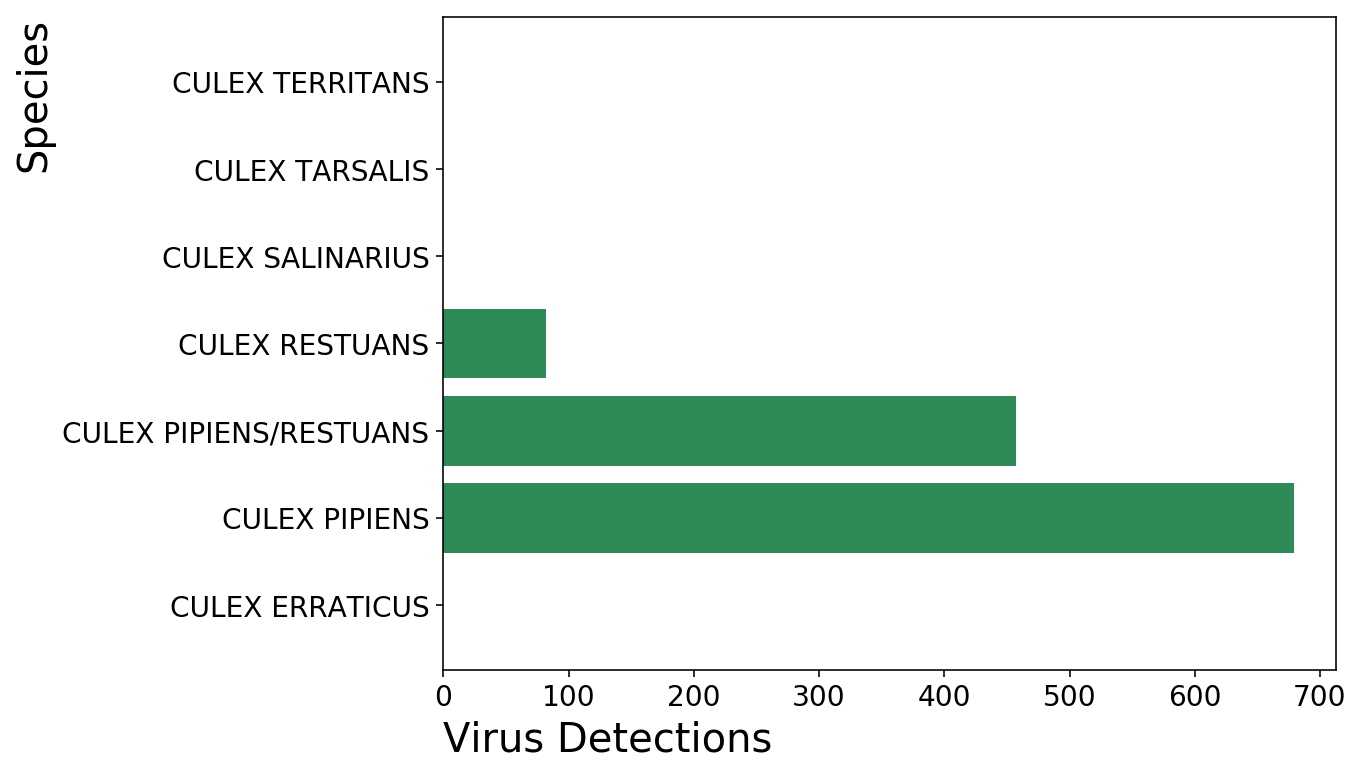

In [60]:
plt.figure(figsize=(8,6))
plt.barh(virus_by_species.index, virus_by_species['virus_detections'], color = 'seagreen')
plt.xticks(fontsize = 14)
plt.yticks(virus_by_species.index,fontsize = 14)
plt.ylabel('Species', fontsize = 20, ha = 'right', y=1)
plt.xlabel('Virus Detections', fontsize = 20, ha = 'left', x=0);

In [68]:
virus_by_precipitation = df[df['WnvPresent'] == 1].groupby(['PrecipTotal']).sum()['WnvPresent']
virus_by_precipitation = pd.DataFrame(virus_by_precipitation)
virus_by_precipitation

,WnvPresent
PrecipTotal,
0.000,759
0.001,64
0.010,20
0.030,2
0.060,16
0.080,9
0.090,73
0.140,5
0.160,2


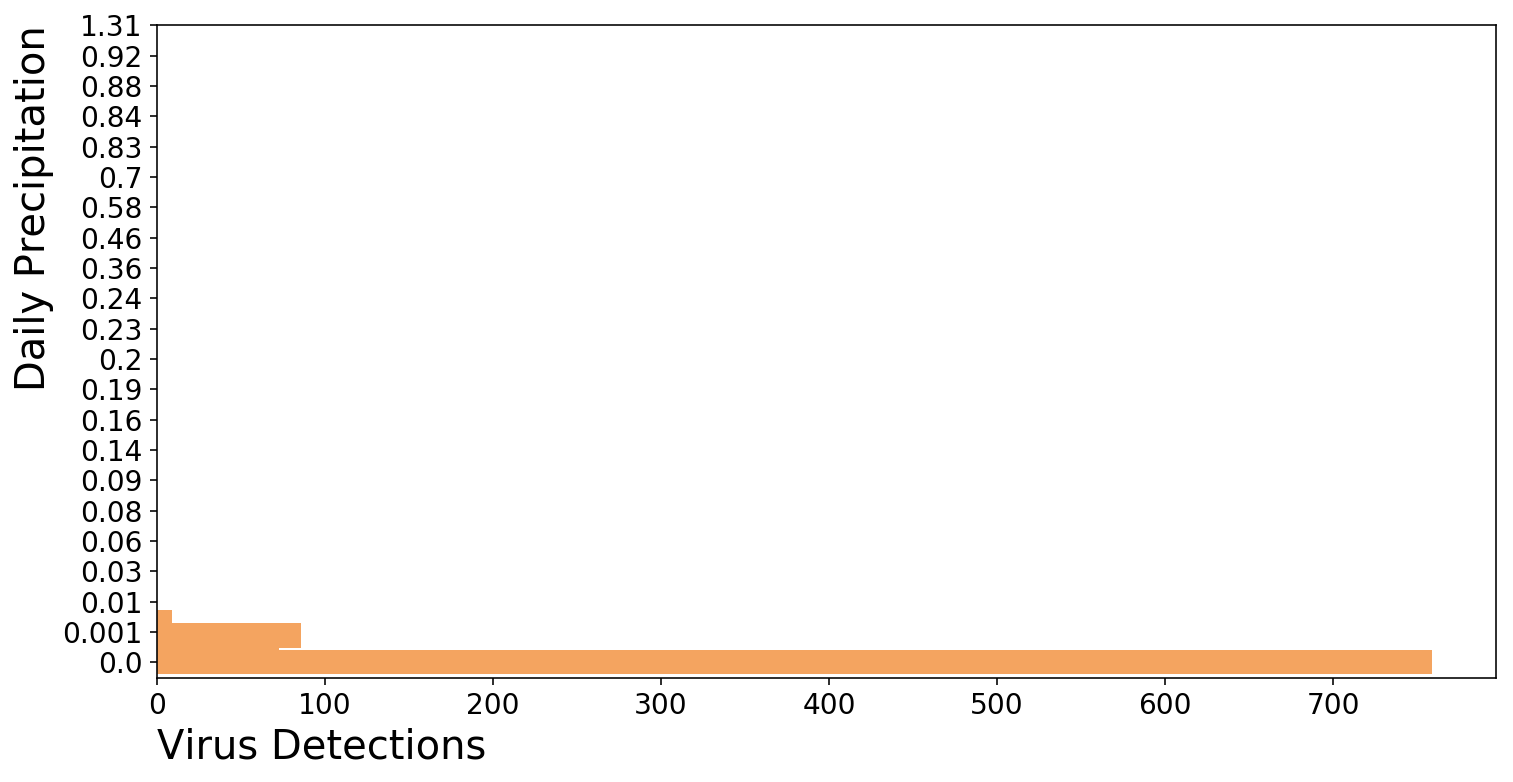

In [74]:
plt.figure(figsize=(12,6))
plt.barh(virus_by_precipitation.index, virus_by_precipitation['WnvPresent'], color = 'sandybrown')
plt.xticks(fontsize = 14)
plt.yticks(range(len(virus_by_precipitation.index)),virus_by_precipitation.index,fontsize = 14)
plt.ylabel('Daily Precipitation', fontsize = 20, ha = 'right', y=1)
plt.xlabel('Virus Detections', fontsize = 20, ha = 'left', x=0);